# ***Check out https://pycaret.gitbook.io/docs/get-started/quickstart***

### **Install pycaret and import libraries**

In [1]:
pip install pycaret

In [2]:
# Import the necessary libraries
import pandas as pd
from pycaret.classification import *


### **Load dataset**

In [3]:
#Load the dataset
data = pd.read_csv('/content/bank_data.csv')

In [4]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### **set up pycaret env**

In [5]:
#Setup the PyCaret classification environment
clf = setup(data, target='Exited')

#The setup() function initializes the PyCaret environment and preprocesses the data.

,Description,Value
0,Session id,8905
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 13)"
4,Transformed data shape,"(10000, 15)"
5,Transformed train set shape,"(7000, 15)"
6,Transformed test set shape,"(3000, 15)"
7,Ordinal features,1
8,Numeric features,9
9,Categorical features,3


### **Compare models, select best, fine tune & evaluate**

In [6]:
#Compare and select a model

best_model = compare_models()

#The compare_models() function trains and evaluates multiple classification models and returns the best-performing model based on the evaluation metric.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8214,0.7919,0.3451,0.6085,0.4394,0.3431,0.3630,0.9880
gbc,Gradient Boosting Classifier,0.8204,0.7611,0.3823,0.5916,0.4636,0.3620,0.3748,1.2240
rf,Random Forest Classifier,0.8190,0.7751,0.3683,0.5877,0.4520,0.3507,0.3648,0.9960
lightgbm,Light Gradient Boosting Machine,0.8179,0.7399,0.4103,0.5732,0.4777,0.3713,0.3791,1.2180
ada,Ada Boost Classifier,0.8100,0.7315,0.3935,0.5471,0.4572,0.3459,0.3530,0.6020
xgboost,Extreme Gradient Boosting,0.8077,0.7431,0.4089,0.5358,0.4625,0.3484,0.3537,0.2840
lr,Logistic Regression,0.7963,0.5761,0.0000,0.0000,0.0000,0.0000,0.0000,0.7650
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2250
nb,Naive Bayes,0.7849,0.7419,0.0645,0.3515,0.1081,0.0481,0.0713,0.1310
dt,Decision Tree Classifier,0.7673,0.6397,0.4243,0.4281,0.4260,0.2801,0.2803,0.1540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [7]:
#Display best model
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=8905, verbose=0, warm_start=False)

In [8]:
#Create the model
#The create_model() function trains the selected model on the entire dataset.

model = create_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8357,0.8495,0.4085,0.6517,0.5022,0.4099,0.4260
1,0.8114,0.7581,0.3521,0.5556,0.4310,0.3248,0.3369
2,0.8243,0.7956,0.3592,0.6145,0.4533,0.3571,0.3754
3,0.8257,0.7748,0.3099,0.6471,0.4190,0.3312,0.3623
4,0.8100,0.7832,0.3077,0.5641,0.3982,0.2968,0.3160
5,0.8329,0.8065,0.3846,0.6548,0.4846,0.3928,0.4126
6,0.8214,0.7951,0.3566,0.6071,0.4493,0.3513,0.3690
7,0.8343,0.7920,0.3916,0.6588,0.4912,0.3998,0.4191
8,0.8086,0.7706,0.3147,0.5556,0.4018,0.2981,0.3152


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=8905, verbose=0, warm_start=False)

In [9]:
#Tune the model
#The tune_model() function performs hyperparameter tuning on the selected model to improve its performance.
tuned_model = tune_model(model)

#we can specify what hypeparametre or metrics to tune on


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7971,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7971,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7971,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7971,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [11]:
#Evaluate the model
evaluate_model(tuned_model)

#The evaluate_model() function provides a detailed evaluation of the model's performance using various metrics.

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

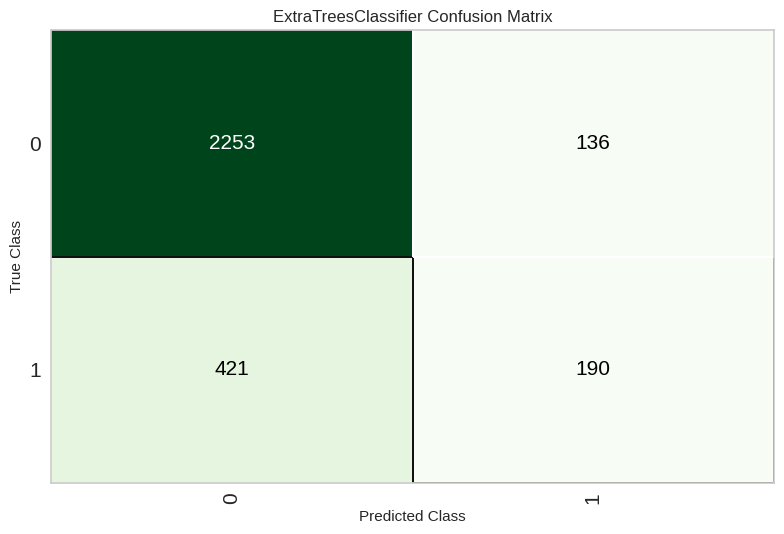

In [12]:
plot_model(tuned_model, plot = 'confusion_matrix')

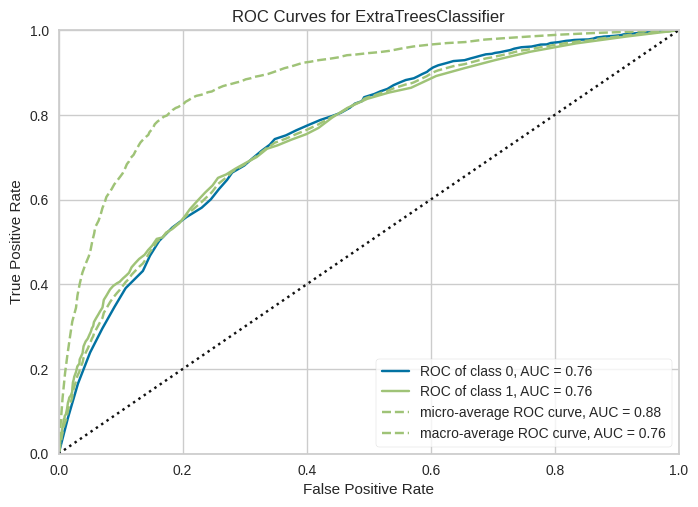

In [15]:
plot_model(tuned_model)